In [1]:
import numpy as np

from matplotlib import pyplot as plt
import pylab

In [2]:
# Mnist lo trae ya directamente el DataSet

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist['data'], mnist['target']

In [5]:
def plot_digit(image_data):
  image = image_data.reshape(28,28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")

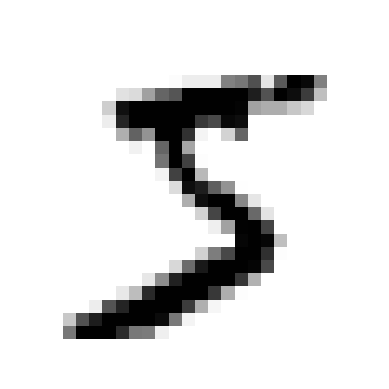

In [6]:
un_digito = X[0]
plot_digit(un_digito)

In [7]:
y = y.astype(int)
y[0]

5

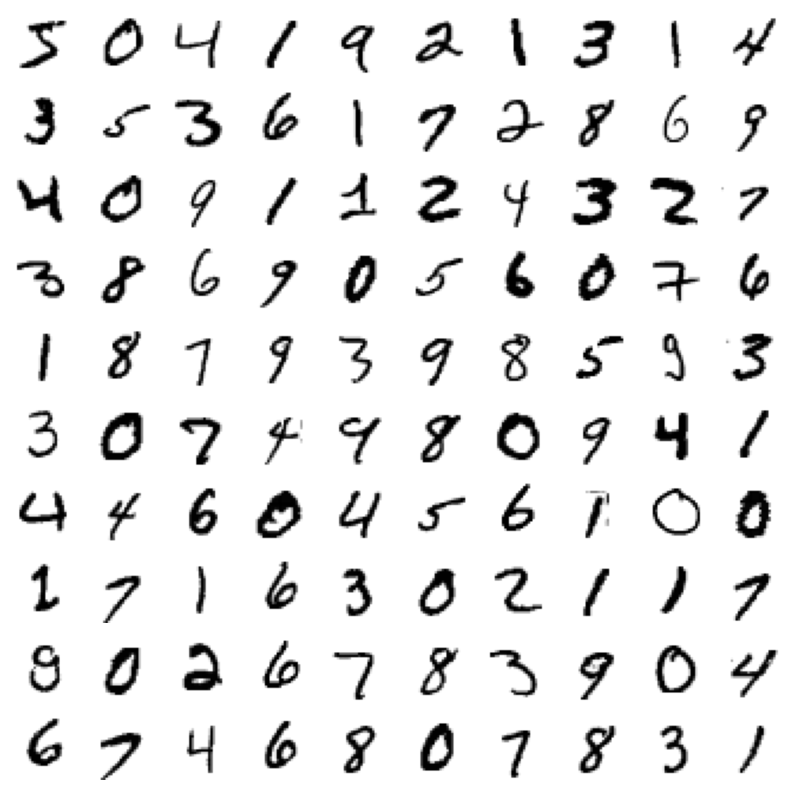

In [8]:
plt.figure(figsize=(10,10))
for i, image_data in enumerate(X[:100]):
  plt.subplot(10, 10, i+1)
  plot_digit(image_data)
plt.show()

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

DETECTOR DE 5

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
y_train_5

array([ True, False, False, ...,  True, False, False])

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train_5)

SGDClassifier()

In [12]:
un_digito = X[5]
sgd_clf.predict([un_digito])

array([False])

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95675, 0.96005, 0.96805])

**INCISO**

In [14]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    return self
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

In [15]:
Never5Classifier = Never5Classifier()
#Muestra que hay pocos 5 por eso hay desproporción y por eso el score es muy alto
cross_val_score(Never5Classifier, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

**CONTINUAMOS**

In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [17]:
# Array que de las imagenes que hay cree que son 5s
y_train_pred 

array([ True, False, False, ...,  True, False, False])

In [18]:
# LOS VERDADEROS NEGATIVOS  Abajo-Derecha
# LOS VERDADERO POSITIVOS   Arriba-Izquierda
# FALSOS POSITIVOS
# FALSO NEGATIVO

# TN    FP
# FN    TP
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53622,   957],
       [ 1638,  3783]], dtype=int64)

Dependiendo del problema vamos a querer más sensibilidad o menos dependiendo del caso

In [19]:
# Score de precisión del modelo

from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_5, y_train_pred)

0.7981012658227848

In [20]:
recall_score(y_train_5, y_train_pred)

0.697841726618705

In [21]:
f1_score(y_train_5, y_train_pred)

0.744611750811928

In [22]:
un_digito = X[17]
y_scores = sgd_clf.decision_function([un_digito])
y

array([5, 0, 4, ..., 4, 5, 6])

In [23]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")
y_scores

array([ -4411.29590556, -27878.0495952 , -28000.05624096, ...,
         4677.71151369,  -2289.59778656,  -7464.95634929])

In [24]:
threshold = 5000
y_pred_new = (y_scores > threshold)

In [25]:
print(precision_score(y_train_5, y_pred_new))
print(recall_score(y_train_5, y_pred_new))


0.9221980413492927
0.3126729385722192


In [26]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

# Así sabemos donde es el punto de mayor precisión con sensibilidad

C:\Users\diego.guizanlopez\AppData\Local\Temp\ipykernel_5028\915992225.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(thresholds, recalls[:-1], "b--", label="RecaLL", linewidth=2,color="Red")


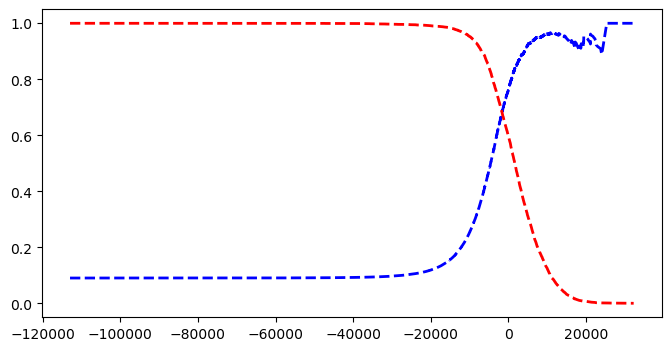

In [27]:
plt.figure(figsize=(8,4))

plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "b--", label="RecaLL", linewidth=2,color="Red")

Text(0, 0.5, 'Precision')

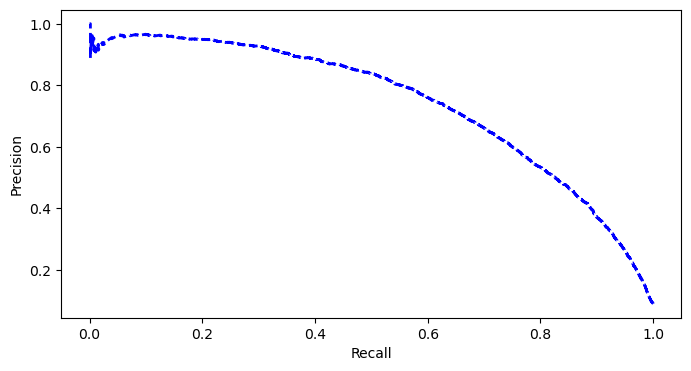

In [28]:
plt.figure(figsize=(8,4))
plt.plot(recalls, precisions, "b--", label="Precision/recall", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [29]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

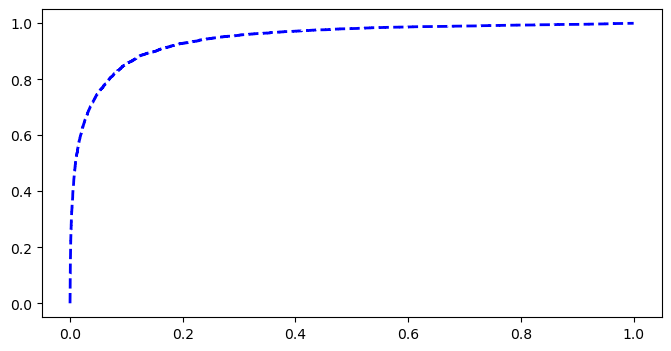

In [30]:
plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, "b--", label="ROC Curve", linewidth=2)

In [31]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9447723641229168

In [32]:
from sklearn.ensemble import RandomForestClassifier

# TARDA 1.5 MIN

forest_clf = RandomForestClassifier()
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")

In [33]:
# Cogemos la probabilidad que pertenezca a los 5s
y_probas_forest[:4]

array([[0.09, 0.91],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

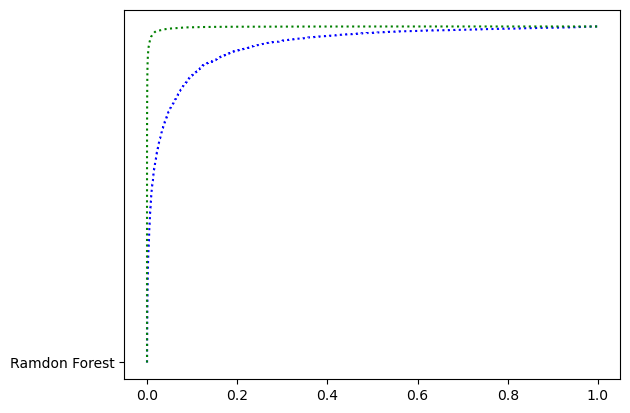

In [34]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot(fpr_forest, tpr_forest, "g:", "Ramdon Forest")

# Comparamos el Score del propio Random Forest para comparar entre el Random Forest y el Descenso del Gradiente, viendo vual es mejor

In [35]:

import xgboost


xgb = xgboost.XGBClassifier()
y_probas_xgb = cross_val_predict(xgb,X_train,y_train_5,cv=3,method="predict_proba")

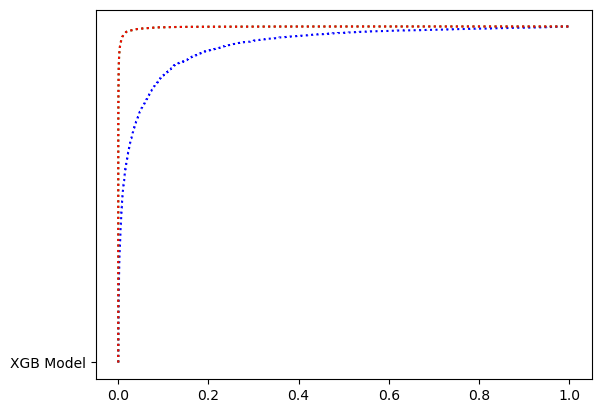

In [36]:
y_scores_xgb = y_probas_forest[:, 1]
fpr_xgb, tpr_xgb, y_probas_xgb = roc_curve(y_train_5, y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot(fpr_xgb, tpr_xgb, "g:", "XGB Model")
plt.plot(fpr_forest, tpr_forest, "r:", label="Random Forest")

# PREDICCIONES

In [37]:
y_train_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
print(roc_auc_score(y_train_5, y_scores_forest))
print(precision_score(y_train_5, y_train_forest))
print(recall_score(y_train_5, y_train_forest))

0.9983912662267093
0.9892721918384518
0.8675521121564287


In [38]:
un_digito = X[0]
from sklearn.svm import SVC

svc_clf = SVC()
# 2000 Primeros digitos
svc_clf.fit(X_train[:2000],y_train[:2000])
print(svc_clf.predict([un_digito]))
un_digito_scores = svc_clf.decision_function([un_digito])
un_digito_scores.round(2)

[5]


array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [39]:
clase_id = un_digito_scores.argmax()
clase_id

5

In [40]:
print(f"el score máximo es el del elemento de orden {clase_id} que vale {un_digito_scores[0][clase_id]} \
 y corresponde a la clase {svc_clf.classes_[clase_id]}")

el score máximo es el del elemento de orden 5 que vale 9.301575971974335  y corresponde a la clase 5


In [41]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train[:2000], y_train[:2000])
ovr_clf.predict([un_digito])

array([5])

In [42]:
sgd_clf = SGDClassifier()
#sgd_clf.fit(X_train, y_train)
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8798 , 0.87355, 0.87555])

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.9037 , 0.89295, 0.9054 ])

In [44]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
y_train_pred = sgd_clf.predict(X_train)

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[5562,    1,    5,   79,    3,  124,   33,   10,   99,    7],
       [   1, 6465,   17,   56,    4,   20,    1,    9,  131,   38],
       [   8,   55, 4710,  482,   35,   76,   54,   75,  437,   26],
       [   9,   16,   44, 5575,    3,  161,    9,   41,  167,  106],
       [   7,   13,   29,   47, 5234,   81,   35,   44,  103,  249],
       [  18,   11,   26,  342,   39, 4592,   42,   18,  264,   69],
       [  18,   13,   19,   34,   29,  280, 5456,    2,   63,    4],
       [  11,    4,   30,   35,   26,   36,    5, 5768,   36,  314],
       [   9,   36,   30,  306,   24,  319,   22,   22, 4901,  182],
       [  16,    4,   21,  121,  150,  112,    2,  267,   85, 5171]],
      dtype=int64)

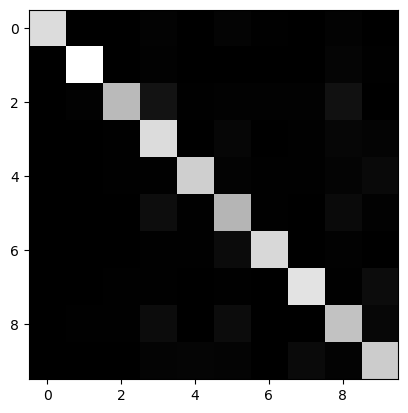

In [46]:
plt.imshow(cm, cmap="gray")

In [47]:
suma_filas = cm.sum(axis = 1, keepdims=True)
suma_filas

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]], dtype=int64)

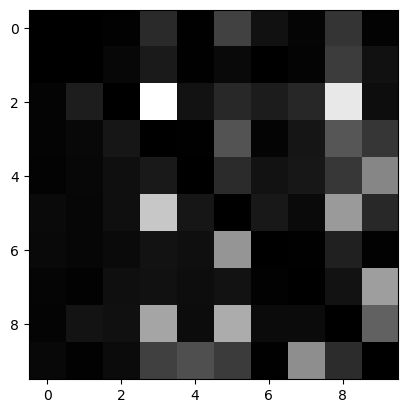

In [48]:
cm2 = cm / suma_filas
np.fill_diagonal(cm2, 0)
plt.imshow(cm2, cmap="gray")

In [ ]:
X_5_como_8 = X_train[(y_train == 5) & (y_train_pred == 8)]
plt.figure(figsize=(6,6))
for i, image_data in enumerate(X_5_como_8[:25]):
  plt.subplot(5, 5, i+1)
  plot_digit(image_data)
plt.show()